In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import glob
from scipy.spatial.distance import cdist
import pdb

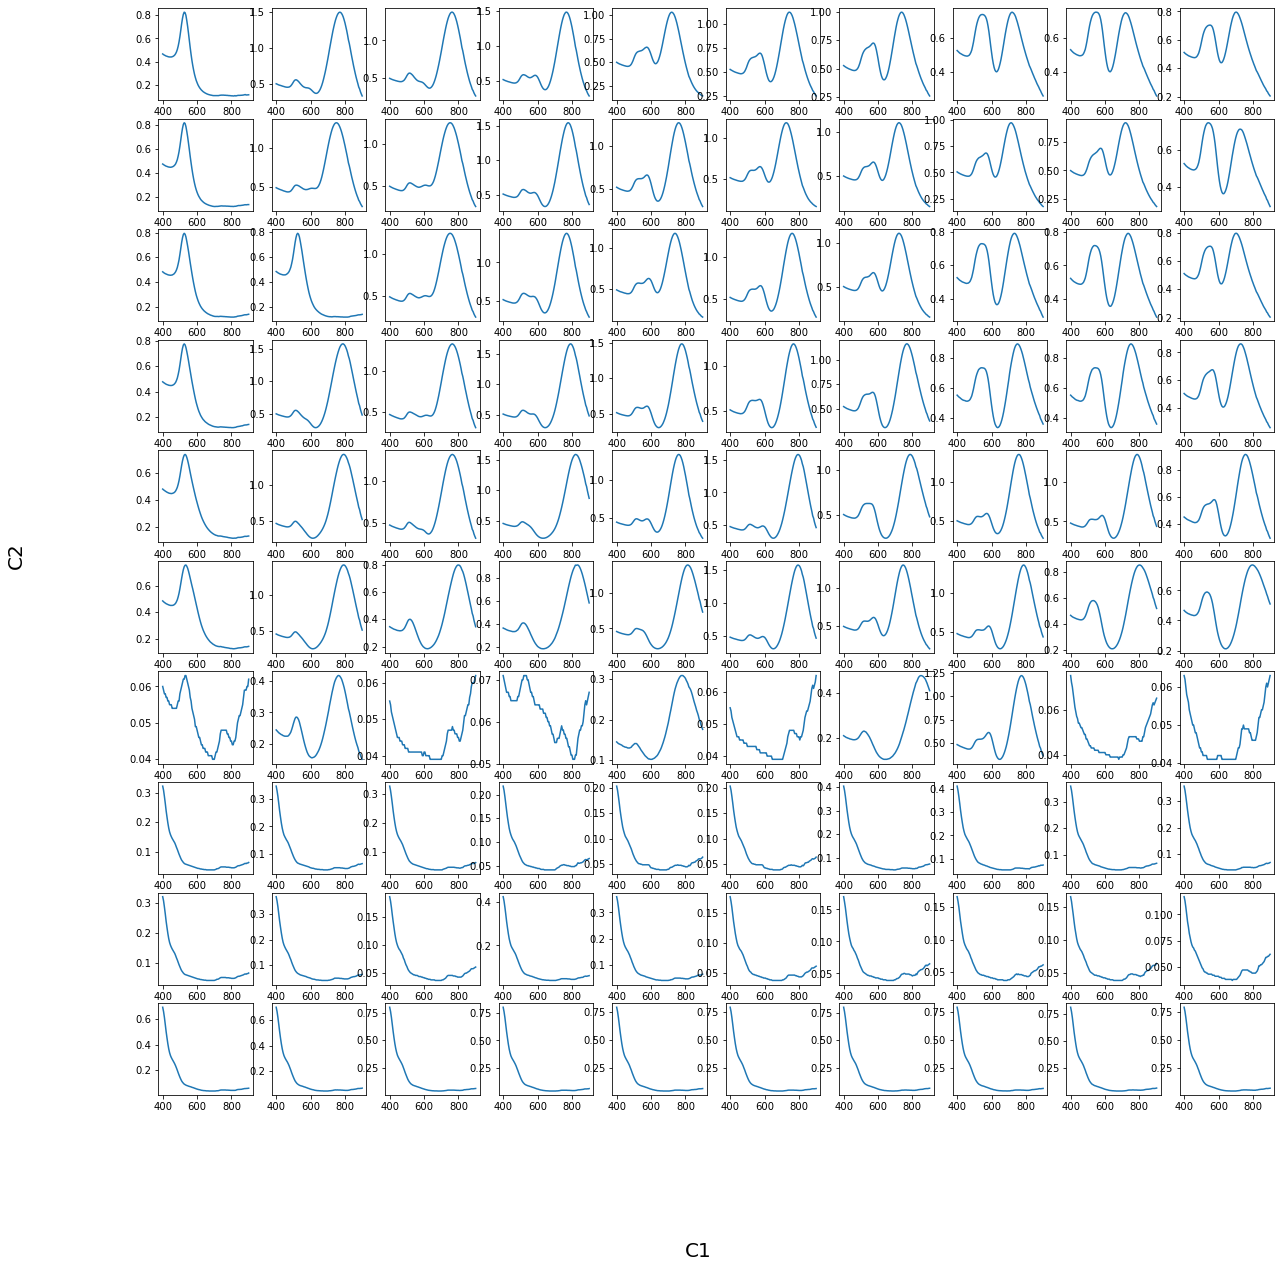

In [20]:
class GNPPhases:
    def __init__(self):
        comps = pd.read_csv('./grid.csv').to_numpy()
        files = glob.glob('./Grid_*.xlsx')
        self.spectra = [pd.read_excel(file) for file in files]
        AG_x = comps[:,0]*0.00064/350*10**5
        AA_x = comps[:,1]*0.00630/350*10**4
        self.points = np.hstack((AG_x.reshape(-1,1)-0.1, AA_x.reshape(-1,1)-0.1))
        self.t = self.spectra[0]['Wavelength'].values.astype('double')
        
    def simulate(self, c):
        rid = np.random.choice(len(self.spectra))
        lookup_dist = cdist(c.reshape(1,-1), self.points)
        lookup_cid = np.argmin(lookup_dist)
        y = self.spectra[rid].iloc[:,lookup_cid+1].values.astype('double')

        return y 
    
    def generate(self):
        self.F = [self.simulate(ci) for ci in self.points]

        return

    def plot(self, fname=None):
        fig, axs = plt.subplots(10,10, figsize=(2*10, 2*10))
        axs = axs.T
        c1 = np.linspace(min(self.points[:,0]), max(self.points[:,0]), 10)
        c2 = np.linspace(min(self.points[:,1]), max(self.points[:,1]), 10)
        for i in range(10):
            for j in range(10):
                cij = np.array([c1[i], c2[j]])
                axs[i,9-j].plot(self.t, self.simulate(cij))
        fig.supxlabel('C1', fontsize=20)
        fig.supylabel('C2', fontsize=20) 
        if fname is not None:
            plt.savefig(fname)
            plt.close()
        else:
            plt.show()

sim = GNPPhases()
sim.plot()